In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights=pd.read_csv("flights.csv")
flights.head(100)

C:\Users\anilkrishna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,1,1,4,B6,2001,N358JB,BUF,JFK,535,...,648.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
96,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,635.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
97,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,1039.0,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0
98,2015,1,1,4,EV,4557,N12967,CRP,IAH,535,...,615.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import seaborn as sns

C:\Users\anilkrishna\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


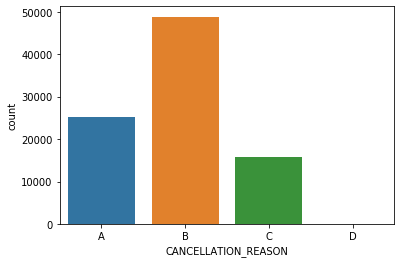

In [6]:
sns.countplot(x="CANCELLATION_REASON",data=flights)

 ## Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
## We can observe from graph easily that mostly Whether is responsible for delays of flight.

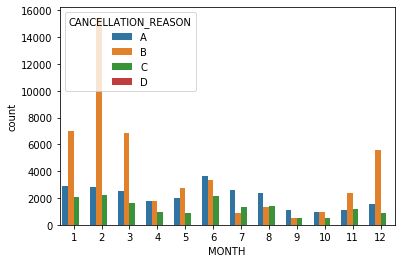

In [8]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

In [10]:
flights.isnull().sum()*100/flights.shape[0]

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

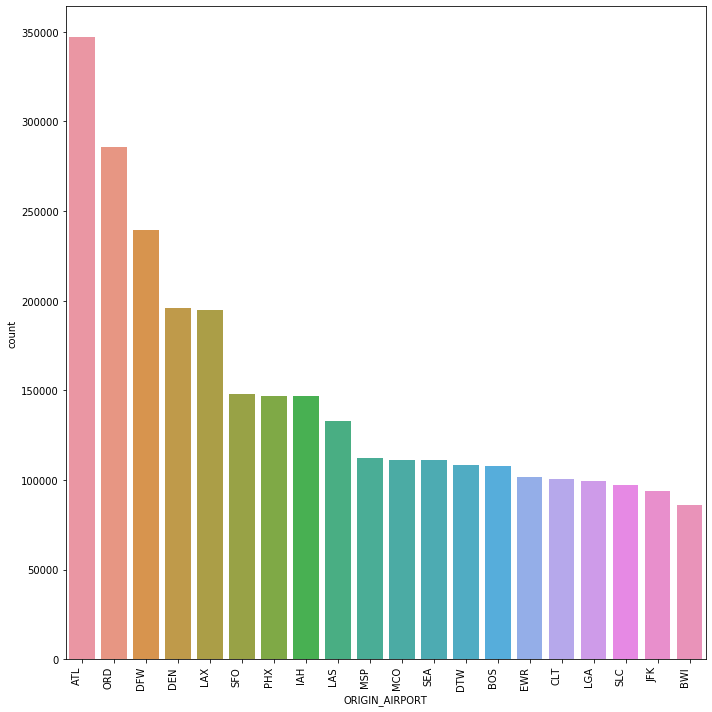

In [12]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights,
              order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

## The Figure shows that Atlanta has the highest count of flight from origin city

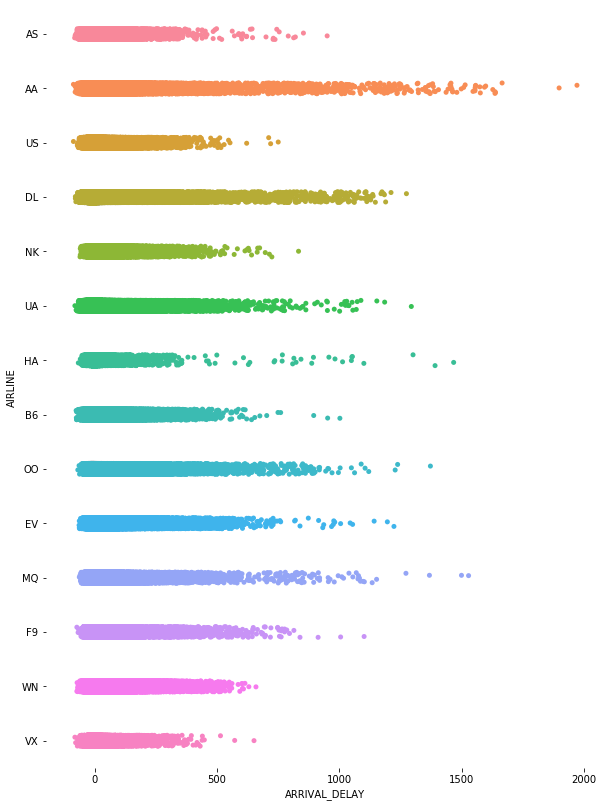

In [13]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = flights, dodge=True, jitter=True
            )
plt.show()

## American Airlines Inc has the highest Arrival Delay.

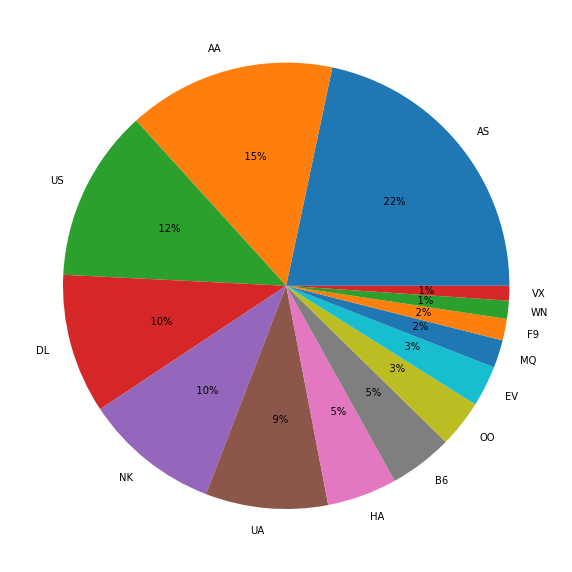

In [14]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

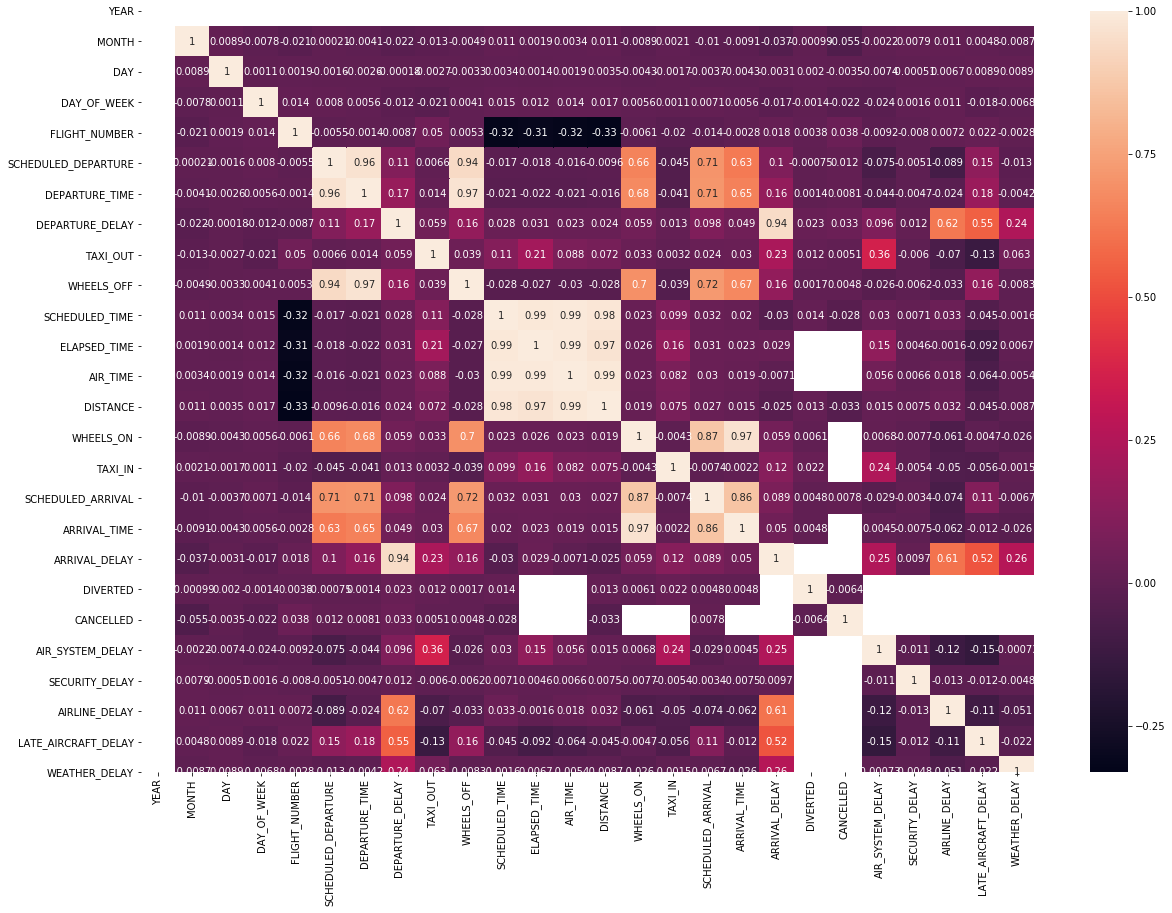

In [15]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

# Very High Correlation Between Arrival Delay and Departure Delay¶
# It shows that maximum of the Arrival Delays are due to the Departure Delays.

In [16]:
corr=flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008874,-0.007847,-0.020746,0.000207,-0.004085,-0.021994,-0.013117,-0.004946,...,-0.010121,-0.009133,-0.036793,-0.000991,-0.055043,-0.002214,0.007925,0.011262,0.004839,-0.008682
DAY,NaN,0.008874,1.000000,0.001111,0.001855,-0.001647,-0.002644,-0.000176,-0.002661,-0.003318,...,-0.003688,-0.004310,-0.003097,0.001981,-0.003537,-0.007375,-0.000510,0.006728,0.008869,0.008882
DAY_OF_WEEK,NaN,-0.007847,0.001111,1.000000,0.014461,0.008007,0.005607,-0.011510,-0.020639,0.004060,...,0.007092,0.005641,-0.017027,-0.001442,-0.022230,-0.023674,0.001576,0.011264,-0.018026,-0.006794
FLIGHT_NUMBER,NaN,-0.020746,0.001855,0.014461,1.000000,-0.005485,-0.001444,-0.008665,0.050369,0.005289,...,-0.013947,-0.002821,0.018419,0.003802,0.037895,-0.009235,-0.007994,0.007168,0.022274,-0.002836
SCHEDULED_DEPARTURE,NaN,0.000207,-0.001647,0.008007,-0.005485,1.000000,0.963791,0.110149,0.006581,0.938008,...,0.706237,0.629342,0.100220,-0.000752,0.011752,-0.075174,-0.005068,-0.089095,0.145054,-0.013470
DEPARTURE_TIME,NaN,-0.004085,-0.002644,0.005607,-0.001444,0.963791,1.000000,0.171723,0.014002,0.971971,...,0.710223,0.648265,0.159787,0.001425,0.008055,-0.043878,-0.004682,-0.024131,0.182374,-0.004221
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,-0.008665,0.110149,0.171723,1.000000,0.058515,0.162582,...,0.097566,0.049236,0.944672,0.022963,0.033099,0.095917,0.011877,0.621296,0.554802,0.243532
TAXI_OUT,NaN,-0.013117,-0.002661,-0.020639,0.050369,0.006581,0.014002,0.058515,1.000000,0.039104,...,0.024384,0.029745,0.227319,0.012251,0.005062,0.361659,-0.005988,-0.070290,-0.127824,0.063308
WHEELS_OFF,NaN,-0.004946,-0.003318,0.004060,0.005289,0.938008,0.971971,0.162582,0.039104,1.000000,...,0.721877,0.667991,0.155773,0.001667,0.004805,-0.026377,-0.006180,-0.032810,0.156089,-0.008338


In [17]:
varaibles_to_remove=['YEAR','FLIGHT_NUMBER',
       'TAIL_NUMBER','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','WHEELS_ON','WHEELS_OFF','AIR_TIME','ELAPSED_TIME','SCHEDULED_TIME']

In [18]:
flights.drop(varaibles_to_remove,axis=1,inplace=True)

In [19]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY'],
      dtype='object')

In [20]:
flights = flights.sample(n=50000)

In [21]:
flights.isnull().sum()

MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE                  0
SCHEDULED_DEPARTURE      0
DEPARTURE_TIME         725
DEPARTURE_DELAY        725
TAXI_OUT               748
DISTANCE                 0
TAXI_IN                787
SCHEDULED_ARRIVAL        0
ARRIVAL_DELAY          885
dtype: int64

In [22]:
flights=flights.dropna()

In [23]:
flights.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
DISTANCE               0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
dtype: int64

In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY'],
      dtype='object')

In [26]:
mm=flights[['MONTH', 'DAY', 'DAY_OF_WEEK',  'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME',  'TAXI_OUT', 'DISTANCE', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY']]

In [27]:
mm.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'TAXI_OUT', 'DISTANCE', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY'],
      dtype='object')

In [28]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mm.values, i) for i in range(mm.shape[1])]
vif["features"] = mm.columns

In [29]:
vif

,VIF Factor,features
0,4.088861,MONTH
1,3.747821,DAY
2,4.208349,DAY_OF_WEEK
3,123.362473,SCHEDULED_DEPARTURE
4,123.779191,DEPARTURE_TIME
5,4.042942,TAXI_OUT
6,2.775561,DISTANCE
7,2.629863,TAXI_IN
8,18.036202,SCHEDULED_ARRIVAL
9,1.153202,ARRIVAL_DELAY


In [30]:
mm=pd.DataFrame(flights)

In [31]:
mm["AIRLINE"].head(40)

3246356    UA
24677      WN
3456253    WN
4146962    DL
1203727    DL
184710     AA
2733270    UA
4205341    AA
5437514    OO
491732     EV
470236     EV
3352391    WN
4285431    EV
368252     DL
2353548    WN
114872     OO
2084444    WN
3350534    MQ
5811894    UA
4379789    WN
5466883    B6
1570540    OO
3425957    DL
5095460    B6
3259257    OO
3819892    AA
4890069    UA
586957     F9
3819149    DL
4414410    DL
897446     WN
382670     DL
475120     B6
186187     B6
1296774    UA
4074669    B6
2759751    NK
1006099    AA
5334005    WN
150905     DL
Name: AIRLINE, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
mm['AIRLINE']= label_encoder.fit_transform(mm['AIRLINE'].astype('category'))

mm.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
3246356,7,22,3,10,1135,1137.0,2.0,16.0,862,8.0,1310,-11.0
24677,1,2,5,13,1550,1620.0,30.0,17.0,948,5.0,1725,20.0
3456253,8,3,1,13,1850,1907.0,17.0,8.0,159,5.0,1950,6.0
4146962,9,15,2,3,1815,1818.0,3.0,10.0,1306,4.0,2030,-8.0
1203727,3,19,4,3,1730,1730.0,0.0,13.0,1576,5.0,1938,-24.0


In [33]:
mm.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY'],
      dtype='object')

In [34]:
mm.shape

(49115, 12)

In [35]:
mm.dtypes

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                  int32
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
DISTANCE                 int64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_DELAY          float64
dtype: object

In [36]:
mm.head(10)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
3246356,7,22,3,10,1135,1137.0,2.0,16.0,862,8.0,1310,-11.0
24677,1,2,5,13,1550,1620.0,30.0,17.0,948,5.0,1725,20.0
3456253,8,3,1,13,1850,1907.0,17.0,8.0,159,5.0,1950,6.0
4146962,9,15,2,3,1815,1818.0,3.0,10.0,1306,4.0,2030,-8.0
1203727,3,19,4,3,1730,1730.0,0.0,13.0,1576,5.0,1938,-24.0
184710,1,12,1,0,2210,2207.0,-3.0,11.0,237,6.0,2309,-10.0
2733270,6,21,7,10,1742,1755.0,13.0,18.0,1346,6.0,1904,0.0
4205341,9,19,6,0,1230,1229.0,-1.0,15.0,304,7.0,1345,1.0
5437514,12,7,1,9,1122,1212.0,50.0,13.0,255,4.0,1238,30.0
491732,2,2,1,4,1339,1336.0,-3.0,13.0,147,8.0,1534,4.0


In [37]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [38]:
final_data=mm

In [39]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [40]:
X.head(10)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
3246356,7,22,3,10,1135,1137.0,16.0,862,8.0,1310,-11.0
24677,1,2,5,13,1550,1620.0,17.0,948,5.0,1725,20.0
3456253,8,3,1,13,1850,1907.0,8.0,159,5.0,1950,6.0
4146962,9,15,2,3,1815,1818.0,10.0,1306,4.0,2030,-8.0
1203727,3,19,4,3,1730,1730.0,13.0,1576,5.0,1938,-24.0
184710,1,12,1,0,2210,2207.0,11.0,237,6.0,2309,-10.0
2733270,6,21,7,10,1742,1755.0,18.0,1346,6.0,1904,0.0
4205341,9,19,6,0,1230,1229.0,15.0,304,7.0,1345,1.0
5437514,12,7,1,9,1122,1212.0,13.0,255,4.0,1238,30.0
491732,2,2,1,4,1339,1336.0,13.0,147,8.0,1534,4.0


In [41]:
Y.head(10)

3246356     2.0
24677      30.0
3456253    17.0
4146962     3.0
1203727     0.0
184710     -3.0
2733270    13.0
4205341    -1.0
5437514    50.0
491732     -3.0
Name: DEPARTURE_DELAY, dtype: float64

In [42]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [43]:
print(model.feature_importances_)

[0.00382837 0.00357106 0.00326698 0.00428613 0.01199972 0.01180362
 0.02435689 0.00517028 0.01224319 0.00405175 0.91542202]


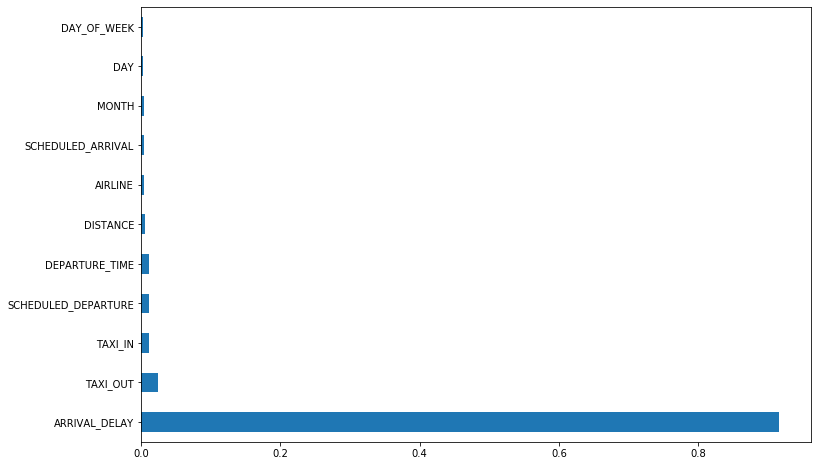

In [44]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
y_pred = reg_rf.predict(X_test)

In [48]:
reg_rf.score(X_train,y_train)

0.9936054574824569

In [49]:
reg_rf.score(X_test,y_test)

0.9638957231546219

In [50]:
metrics.r2_score(y_test,y_pred)

0.9638957231546219

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4.776578438358953
MSE: 52.38013182327191
RMSE: 7.237411956167199


In [52]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp.head(10)

,Actual,Predicted
116356,76.0,80.48
3476460,89.0,93.35
5425678,8.0,8.74
4058540,-5.0,1.87
1103156,-6.0,-2.17
3237415,6.0,-3.27
4060111,-3.0,-2.62
3392249,99.0,108.59
5611352,-4.0,-1.44
4832012,-4.0,0.85


In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [55]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [56]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.4s
[CV] n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.4s
[CV] n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.2s
[CV] n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.5s
[CV] n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=148, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.4s
[CV] n_estimators=182, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=182, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  18.9s
[CV] n_estimators=182, min_samples_split=10, min_s

[CV]  n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=113, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=113, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=113, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  41.7s
[CV] n_estimators=113, min_samples_split=15, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [58]:
rf_random.best_params_

{'n_estimators': 113,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [59]:
p=rf_random.predict(X_test)

In [60]:
metrics.r2_score(y_test,p)

0.9638957215996622

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 4.745083041464595
MSE: 52.38013407920955
RMSE: 7.237412112019706


In [62]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz.head(30)

,Actual,Predicted
116356,76.0,81.760899
3476460,89.0,94.001225
5425678,8.0,9.443188
4058540,-5.0,2.731755
1103156,-6.0,-1.527344
3237415,6.0,-3.278337
4060111,-3.0,-3.621729
3392249,99.0,109.510179
5611352,-4.0,-1.396449
4832012,-4.0,2.886083


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
gbr=GradientBoostingRegressor(random_state=0)

In [65]:
GBR=gbr.fit(X_train,y_train)

In [66]:
pre =GBR.predict(X_test)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 4.77864478275614
MSE: 50.42536698126642
RMSE: 7.101082099318837


In [68]:
metrics.r2_score(y_test,pre)

0.9652430922536822

In [69]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg.head(20)

,Actual,Predicted
116356,76.0,80.593943
3476460,89.0,89.443338
5425678,8.0,8.519740
4058540,-5.0,2.902099
1103156,-6.0,-1.208760
3237415,6.0,-2.434404
4060111,-3.0,-3.693308
3392249,99.0,106.881963
5611352,-4.0,2.162846
4832012,-4.0,2.266035


In [70]:
def predict(MONTH, DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,
       DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL, ARRIVAL_DELAY):
    
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = DAY_OF_WEEK
    x[3] = AIRLINE
    x[4] = SCHEDULED_DEPARTURE
    x[5] = DEPARTURE_TIME
    x[6] = TAXI_OUT
    x[7] = DISTANCE
    x[8] = TAXI_IN
    x[9] = SCHEDULED_ARRIVAL
    x[10] = ARRIVAL_DELAY
  
   
        

     
    return gbr.predict([x])[0]

In [71]:
predict(1,27,2,10,735,733.0,29.0,622,18.0,850,8.0)

-2.232234600998961

In [73]:
predict(4,26,7,7,1552,1633.0,12.0,522,9.0,1738,28.0)

28.70458304330314

In [76]:
final_data.to_csv("BATCH_FILE.csv")

In [77]:
import pickle
with open('batch_.pickle','wb') as f:
    pickle.dump(gbr,f)

In [78]:
import pickle
with open ('zz.pickle','wb') as f:
    pickle.dump(gbr,f)